# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#build the dataframe
city_data_df = pd.DataFrame(columns=(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 
                                      'Wind Speed', 'Country', 'Date']))
#load cities in df
city_data_df['City'] = cities

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
rec_num = 1
failed = 0

print("Beginning Data Retrieval")    
print("-----------------------------")

for index, row in city_data_df.iterrows():
    city = row['City']
    try:
        query_url = f"{base_url}q={city}&units={units}&appid={weather_api_key}"  
        response = requests.get(query_url).json() 
        
        #load city weather data into data frame
        city_data_df.loc[index, 'City'] = response['name']
        city_data_df.loc[index, 'Lat'] = response['coord']['lat']
        city_data_df.loc[index, 'Lng'] = response['coord']['lon']
        city_data_df.loc[index, 'Max Temp'] = response['main']['temp_max'] ### Farenheit ###
        city_data_df.loc[index, 'Humidity'] = response['main']['humidity'] ### percentage ###
        city_data_df.loc[index, 'Cloudiness'] = response['clouds']['all'] ### percentage ###
        city_data_df.loc[index, 'Wind Speed'] = response['wind']['speed'] ### mph ###
        city_data_df.loc[index, 'Country'] = response['sys']['country']
        date = (datetime.datetime.fromtimestamp(response['dt'])).strftime('%Y-%m-%d %H:%M:%S')
        city_data_df.loc[index, 'Date'] = date 
        
        print(f"Processing Record #{rec_num} city name: {row['City']}")
        rec_num += 1
    except (KeyError, IndexError):
        print(f"{row['City']} not found skipping...")
        city_data_df.drop(index, inplace=True)
        failed += 1
        
print(f"Number of records skipped: {failed}")
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record #1 city name: Busselton
saleaula not found skipping...
Processing Record #2 city name: lebu
Processing Record #3 city name: chuy
Processing Record #4 city name: saint anthony
Processing Record #5 city name: kalmunai
Processing Record #6 city name: qaanaaq
Processing Record #7 city name: camacha
Processing Record #8 city name: east london
Processing Record #9 city name: vaini
Processing Record #10 city name: souillac
Processing Record #11 city name: albany
Processing Record #12 city name: mayo
Processing Record #13 city name: ushuaia
Processing Record #14 city name: nikolskoye
Processing Record #15 city name: vestmannaeyjar
Processing Record #16 city name: cape town
Processing Record #17 city name: trairi
Processing Record #18 city name: navrongo
Processing Record #19 city name: victoria
Processing Record #20 city name: new norfolk
Processing Record #21 city name: mataura
Processing Record #22 city name: hasaki
Pro

Processing Record #177 city name: whyalla
Processing Record #178 city name: batagay-alyta
Processing Record #179 city name: kutum
Processing Record #180 city name: kaitangata
Processing Record #181 city name: isiro
Processing Record #182 city name: mahibadhoo
Processing Record #183 city name: dikson
Processing Record #184 city name: asau
Processing Record #185 city name: westport
Processing Record #186 city name: floro
Processing Record #187 city name: roebourne
Processing Record #188 city name: huallanca
Processing Record #189 city name: luanda
Processing Record #190 city name: atar
kamenskoye not found skipping...
Processing Record #191 city name: santa ana
Processing Record #192 city name: darhan
Processing Record #193 city name: faya
Processing Record #194 city name: cidreira
bargal not found skipping...
Processing Record #195 city name: ilulissat
sentyabrskiy not found skipping...
lolua not found skipping...
Processing Record #196 city name: basco
Processing Record #197 city name:

Processing Record #348 city name: irituia
Processing Record #349 city name: inhambane
Processing Record #350 city name: sur
Processing Record #351 city name: kavaratti
Processing Record #352 city name: hofn
Processing Record #353 city name: mehamn
Processing Record #354 city name: manuk mangkaw
Processing Record #355 city name: mweka
Processing Record #356 city name: puri
Processing Record #357 city name: taoudenni
Processing Record #358 city name: iraquara
Processing Record #359 city name: namibe
Processing Record #360 city name: seoul
Processing Record #361 city name: galle
Processing Record #362 city name: luwuk
Processing Record #363 city name: dunedin
Processing Record #364 city name: beidao
Processing Record #365 city name: sirajganj
Processing Record #366 city name: geraldton
Processing Record #367 city name: luena
Processing Record #368 city name: hudson bay
Processing Record #369 city name: dingle
Processing Record #370 city name: salalah
haibowan not found skipping...
Process

Processing Record #530 city name: catio
skagastrond not found skipping...
Processing Record #531 city name: gondar
Processing Record #532 city name: kawalu
Processing Record #533 city name: andenes
Processing Record #534 city name: derzhavinsk
Processing Record #535 city name: roma
Processing Record #536 city name: la palma
Processing Record #537 city name: colares
Processing Record #538 city name: juneau
Processing Record #539 city name: dauriya
Processing Record #540 city name: na klang
Number of records skipped: 59
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df.to_csv(output_data_file, index=False)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.333,53.01,98,75,8.03,AU,2021-04-19 16:18:58
2,Lebu,-37.6167,-73.65,58.35,95,100,15.99,CL,2021-04-19 16:18:52
3,Chui,-33.6971,-53.4616,64.98,79,0,10.04,UY,2021-04-19 16:23:11
4,Saint Anthony,45.0205,-93.218,39,44,90,11.5,US,2021-04-19 16:23:11
5,Kalmunai,7.4167,81.8167,78.31,83,93,1.83,LK,2021-04-19 16:23:12


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
city_data_df['Humidity'].max()

100

In [6]:
#  Get the indices of cities that have humidity over 100%.
#  N/A

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
#read in cities.csv file to data frame
weather_df = pd.read_csv("output_data/cities.csv")
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,53.01,98,75,8.03,AU,2021-04-19 16:18:58
1,Lebu,-37.6167,-73.6500,58.35,95,100,15.99,CL,2021-04-19 16:18:52
2,Chui,-33.6971,-53.4616,64.98,79,0,10.04,UY,2021-04-19 16:23:11
3,Saint Anthony,45.0205,-93.2180,39.00,44,90,11.50,US,2021-04-19 16:23:11
4,Kalmunai,7.4167,81.8167,78.31,83,93,1.83,LK,2021-04-19 16:23:12


## Latitude vs. Temperature Plot

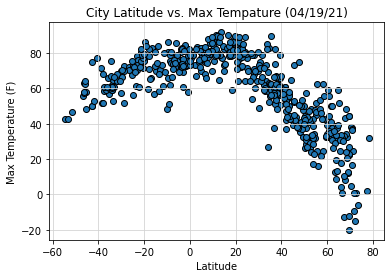

In [41]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolors='black')
plt.title("City Latitude vs. Max Tempature (04/19/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

plt.savefig('output_data/LatVsMaxTemp')
plt.show()

## Latitude vs. Humidity Plot

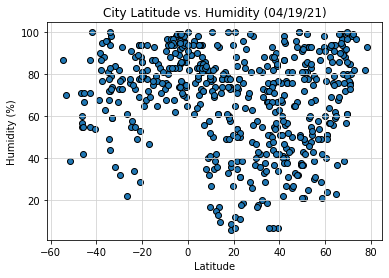

In [42]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolors='black')
plt.title("City Latitude vs. Humidity (04/19/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which='major',axis='both',linestyle="-",color='lightgrey')

plt.savefig('output_data/LatVsHumid')
plt.show()

## Latitude vs. Cloudiness Plot

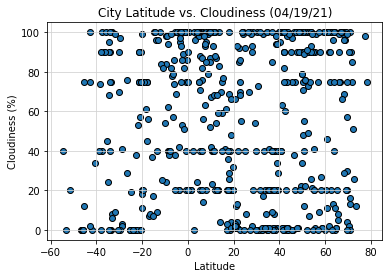

In [43]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs. Cloudiness (04/19/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

plt.savefig('output_data/LatVsCloud')
plt.show()

## Latitude vs. Wind Speed Plot

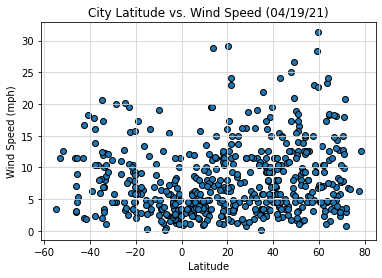

In [44]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs. Wind Speed (04/19/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

plt.savefig('output_data/LatVsWind')
plt.show()

## Linear Regression

In [45]:
north_hemi = weather_df.loc[weather_df['Lat'] >= 0]
south_hemi = weather_df.loc[weather_df['Lat'] < 0]
north_count = len(north_hemi)
south_count = len(south_hemi)
print(f"There are {north_count} cities in the northern hemisphere from the dataframe.")
print(f"There are {south_count} cities in the southern hemisphere from the dataframe.")

There are 380 cities in the northern hemisphere from the dataframe.
There are 160 cities in the southern hemisphere from the dataframe.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

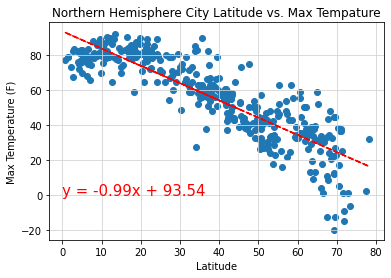

The r-value is: 0.7539996117732044


In [46]:
north_hemi_lat = north_hemi['Lat']
north_hemi_max_temp = north_hemi['Max Temp']
# Perform a linear regression for the Northern Hemisphere on cities max temp vs latitude
ntl_slope, ntl_int, ntl_r, ntl_p, ntl_std_err = linregress(north_hemi_lat, north_hemi_max_temp)

# Create equation of line to calculate predicted max temp
ntl_fit = ntl_slope * north_hemi_lat + ntl_int

# Create line equation string
line_eq = f"y = {ntl_slope:1.2f}x + {ntl_int:1.2f}"

plt.scatter(north_hemi_lat, north_hemi_max_temp)
plt.plot(north_hemi_lat, ntl_fit, "--", color = 'r')

plt.title("Northern Hemisphere City Latitude vs. Max Tempature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(0, 0),fontsize=15,color="red")

plt.savefig('output_data/NorthHemiLatVsMaxTemp')
plt.show()

print(f"The r-value is: {ntl_r**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

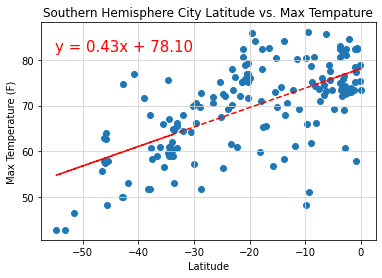

The r-value is: 0.40173935043569176


In [47]:
south_hemi_lat = south_hemi['Lat']
south_hemi_max_temp = south_hemi['Max Temp']
# Perform a linear regression for the Southern Hemisphere on cities max temp vs latitude
stl_slope, stl_int, stl_r, stl_p, stl_std_err = linregress(south_hemi_lat, south_hemi_max_temp)

# Create equation of line to calculate predicteded max temp
stl_fit = stl_slope * south_hemi_lat + stl_int

# Create line equation string
line_eq = f"y = {stl_slope:1.2f}x + {stl_int:1.2f}"

plt.scatter(south_hemi_lat, south_hemi_max_temp)
plt.plot(south_hemi_lat, stl_fit, "--", color = 'r')

plt.title("Southern Hemisphere City Latitude vs. Max Tempature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(-55, 82),fontsize=15,color="red")

plt.savefig('output_data/SouthHemiLatVsMaxTemp')
plt.show()

print(f"The r-value is: {stl_r**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

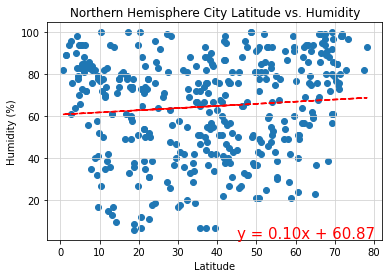

The r-value is: 0.007729928473688534


In [48]:
north_hemi_humidity = north_hemi['Humidity']
# Perform a linear regression for the Northern Hemisphere on cities humidity vs latitude
nhl_slope, nhl_int, nhl_r, nhl_p, nhl_std_err = linregress(north_hemi_lat, north_hemi_humidity)

# Create equation of line to calculate predicted humidity
nhl_fit = nhl_slope * north_hemi_lat + nhl_int

# Create line equation string
line_eq = f"y = {nhl_slope:1.2f}x + {nhl_int:1.2f}"

plt.scatter(north_hemi_lat, north_hemi_humidity)
plt.plot(north_hemi_lat, nhl_fit, "--", color = 'r')

plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(45, 2),fontsize=15,color="red")

plt.savefig('output_data/NorthHemiLatVsHumid')
plt.show()

print(f"The r-value is: {nhl_r**2}") 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

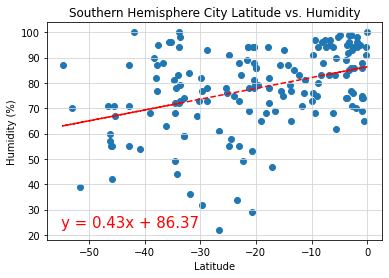

The r-value is: 0.14469392358158864


In [49]:
south_hemi_humidity = south_hemi['Humidity']
# Perform a linear regression for the Southern Hemisphere on cities humidity vs latitude
shl_slope, shl_int, shl_r, shl_p, shl_std_err = linregress(south_hemi_lat, south_hemi_humidity)

# Create equation of line to calculate predicted humidity
shl_fit = shl_slope * south_hemi_lat + shl_int

# Create line equation string
line_eq = f"y = {shl_slope:1.2f}x + {shl_int:1.2f}"

plt.scatter(south_hemi_lat, south_hemi_humidity)
plt.plot(south_hemi_lat, shl_fit, "--", color = 'r')

plt.title("Southern Hemisphere City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(-55, 23),fontsize=15,color="red")

plt.savefig('output_data/SouthHemiLatVsHumid')
plt.show()

print(f"The r-value is: {shl_r**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

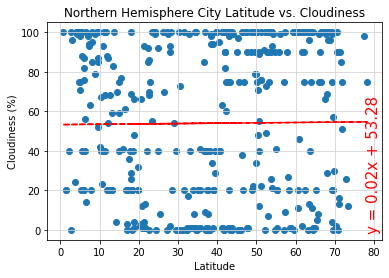

The r-value is: 8.651567833673358e-05


In [50]:
north_hemi_cloudiness = north_hemi['Cloudiness']
# Perform a linear regression for the Northern Hemisphere on cities cloudiness vs latitude
ncl_slope, ncl_int, ncl_r, ncl_p, ncl_std_err = linregress(north_hemi_lat, north_hemi_cloudiness)

# Create equation of line to calculate predicted cloudiness
ncl_fit = ncl_slope * north_hemi_lat + ncl_int

# Create line equation string
line_eq = f"y = {ncl_slope:1.2f}x + {ncl_int:1.2f}"

plt.scatter(north_hemi_lat, north_hemi_cloudiness)
plt.plot(north_hemi_lat, ncl_fit, "--", color = 'r')

plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(78, 0),fontsize=15,color="red", rotation='vertical')

plt.savefig('output_data/NorthHemiLatVsCloud')
plt.show()

print(f"The r-value is: {ncl_r**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

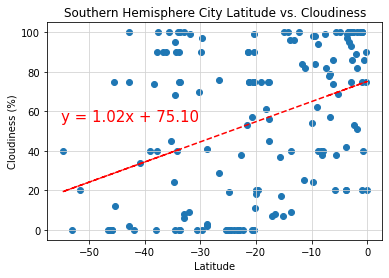

The r-value is: 0.15022644743564803


In [51]:
south_hemi_cloudiness = south_hemi['Cloudiness']
# Perform a linear regression for the Southern Hemisphere on cities cloudiness vs latitude
scl_slope, scl_int, scl_r, scl_p, scl_std_err = linregress(south_hemi_lat, south_hemi_cloudiness)

# Create equation of line to calculate predicted cloudiness
scl_fit = scl_slope * south_hemi_lat + scl_int

# Create line equation string
line_eq = f"y = {scl_slope:1.2f}x + {scl_int:1.2f}"

plt.scatter(south_hemi_lat, south_hemi_cloudiness)
plt.plot(south_hemi_lat, scl_fit, "--", color = 'r')

plt.title("Southern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq, (-55, 55),fontsize=15,color="red")

plt.savefig('output_data/SouthHemiLatVsCloud')
plt.show()

print(f"The r-value is: {scl_r**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

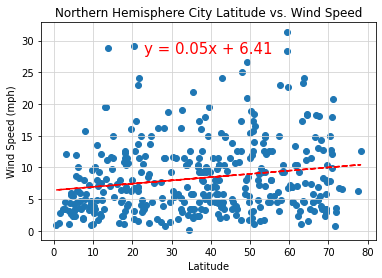

The r-value is: 0.03362464042132948


In [52]:
north_hemi_wind = north_hemi['Wind Speed']
# Perform a linear regression for the Northern Hemisphere on cities wind speed vs latitude
nwl_slope, nwl_int, nwl_r, nwl_p, nwl_std_err = linregress(north_hemi_lat, north_hemi_wind)

# Create equation of line to calculate predicted wind speed
nwl_fit = nwl_slope * north_hemi_lat + nwl_int

# Create line equation string
line_eq = f"y = {nwl_slope:1.2f}x + {nwl_int:1.2f}"

plt.scatter(north_hemi_lat, north_hemi_wind)
plt.plot(north_hemi_lat, nwl_fit, "--", color = 'r')

plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(23, 28),fontsize=15,color="red")

plt.savefig('output_data/NorthHemiLatVsWind')
plt.show()

print(f"The r-value is: {nwl_r**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

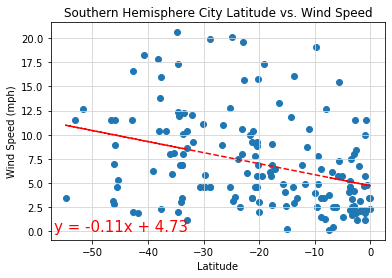

The r-value is: 0.11892001966326277


In [53]:
south_hemi_wind = south_hemi['Wind Speed']
# Perform a linear regression for the Southern Hemisphere on cities wind speed vs latitude
swl_slope, swl_int, swl_r, swl_p, swl_std_err = linregress(south_hemi_lat, south_hemi_wind)

# Create equation of line to calculate predicted wind speed
swl_fit = swl_slope * south_hemi_lat + swl_int

# Create line equation string
line_eq = f"y = {swl_slope:1.2f}x + {swl_int:1.2f}"

plt.scatter(south_hemi_lat, south_hemi_wind)
plt.plot(south_hemi_lat, swl_fit, "--", color = 'r')

plt.title("Southern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(-57, 0),fontsize=15,color="red")

plt.savefig('output_data/SouthHemiLatVsWind')
plt.show()

print(f"The r-value is: {swl_r**2}")